***THE UNSINKABLE TITANIC***

<cite>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. <br>
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy. 
</cite>

In [60]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r'titanic_data.csv'
data = pd.read_csv(path)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Meaning of the Columns**
PassengerId: Id for the passenger in this dataset <br>
Survived: 1 = Yes, 0 = No <br>
Pclass: Passenger Class (1 = best class, 3 = 3rd class)  <br>
Name: Name  <br>
Sex: Sex <br>
Age: Age<br>
SibS: Number of Siblings/Spouses Aboard<br>
Parch: Number of Parents/Children Aboard<br>
Ticket: Ticket Number<br>
Fare: Passenger Fare<br>
Cabin: Cabin Number<br>
Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>

In [61]:
len(data)

891

In [62]:
df = pd.read_csv(path, index_col=0, parse_dates=True)

In [63]:
df.Survived.sum()

342

In [64]:
#return the NaN Values of the columns
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [65]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
per_total_survivors = (722*100)/2224
per_sample_surviviors = (342*100)/891

print 'Total survivors:', per_total_survivors, '%'
print 'Sample survivors:', per_sample_surviviors, '%'

Total survivors: 32 %
Sample survivors: 38 %


**This Dataset**

We have the Data of *891 Passengers* of the Titanic. As the total number of passengers and crew was 2224 Persons, we will have to treat this data like a sample and use Bessels Correction for our calculations. We have the age for 714 passengers and cabin numbers for 204 passengers.
From this group of passengers(891 Passengers), 342 passengers survived. 
The mean age of the passengers is around 30 years. The youngest Passenger was a Baby and the oldest Passenger was 80 years old.

**This leads to the following questions:**

*1. Fares and Embarkation*
- Is there a relation between the class and the ticket fare?
- Is there a relation between the port of embarkation and class?
- Is there a difference between the wealth of the people from the embarkation point? 
- Is there a relation between the passenger class and the survival rate? Are passengers from the first class more likely to survive?

*2. Family Spirit*
- Is a person with a Sibling/Spouse on board more likely to survive?
- Is a person with Parents and Children on board more likely to survive?
- Is a person with both Siblings and Parents on board more likely to survive?

*3. Women and children first*
- Is there a relation between the sex and the survival rate?
- Is there a relation between the age and the survial rate?
- Are female passengers with first class tickets more likely to survive than male passengers from third class?

*4. Nomen est omen*
- What is the most common first name?
- What is the most common last name? 
- Where they more likely to survive?

*** 1. Fares and Embarkation ***

*1a. Is there a relation between the passenger class and the tickte fare?*

In [163]:
fare_df = df.loc[:,['Fare', 'Pclass']]
#skip the null values for the fares
fare_df.Fare = fare_df.Fare[fare_df.Fare > 0]
fare_df.Pclass = fare_df.Pclass[fare_df.Fare > 0]

fare_df = fare_df.groupby(['Pclass'])
fare_df.describe()

Fare
Pclass                  
1.0    count  211.000000
       mean    86.148874
       std     78.212155
       min      5.000000
       25%     32.910400
       50%     61.979200
       75%     99.962500
       max    512.329200
2.0    count  178.000000
       mean    21.358661
       std     13.083169
       min     10.500000
       25%     13.000000
       50%     15.022900
       75%     26.000000
       max     73.500000
3.0    count  487.000000
       mean    13.787875
       std     11.760718
       min      4.012500
       25%      7.750000
       50%      8.050000
       75%     15.500000
       max     69.550000

Of course there is a relation between the fare and the passenger class. The mean price for a first class ticket is 86.14, the mean price for a second class ticket is 21.35 and the mean price for a third class ticket is 13.78.

In [67]:
#In what Port was the most expensive ticket bought?
#C = Cherbourg; Q = Queenstown; S = Southampton
#What was the most expensive ticket
fare_list = df['Fare'].tolist()
embarked_list = df['Embarked'].tolist()

fare = pd.Series(fare_list, index=embarked_list)

def highest_fare(fare):
    port_with_highest_fare = fare.argmax()
    highest_fare = fare.max()
    mean_fare = fare.mean()
    #because min value is 0.00
    min_fare = fare.min()
     
    return (port_with_highest_fare, highest_fare, mean_fare, min_fare)

print highest_fare(fare)

('C', 512.32920000000001, 32.2042079685746, 0.0)


The most expensive ticket was sold in Cherbourg and it cost 512.33.

*1b. Is there a relation between the port of embarkation and the passenger class?*

Class of the passengers by port


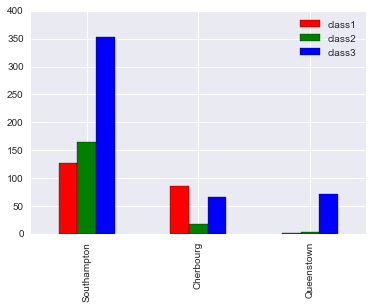

In [76]:
def get_class_by_embarking(port, pclass):    
    pclass = df[(df["Embarked"]== port) & (df['Pclass'] == pclass)].count().Cabin
    return pclass

def count_pclasses_by_embarking_port(port, pclass):
    pclass = df[(df["Embarked"]== port) & (df['Pclass'] == pclass)].count().Embarked
    return pclass
    
C_1 = count_pclasses_by_embarking_port('C', 1)
C_2 = count_pclasses_by_embarking_port('C', 2)
C_3 = count_pclasses_by_embarking_port('C', 3)

Q_1 = count_pclasses_by_embarking_port('Q', 1)
Q_2 = count_pclasses_by_embarking_port('Q', 2)
Q_3 = count_pclasses_by_embarking_port('Q', 3)

S_1 = count_pclasses_by_embarking_port('S', 1)
S_2 = count_pclasses_by_embarking_port('S', 2)
S_3 = count_pclasses_by_embarking_port('S', 3)

embarkation_df = pd.DataFrame(
    data={'passengers_total': [644, 168, 77],
          'cabin': [129, 69, 4],
          'class1': [S_1, C_1 ,Q_1],
          'class2':[S_2, C_2 ,Q_2],
          'class3': [S_3, C_3 ,Q_3],
          'survived': [217, 93, 30]},
            
    index=['Southampton', 'Cherbourg', 'Queenstown']
)
print 'Class of the passengers by port'

#data_by_location = embarkation_df.groupBy(['Pclass'], asIndex= false)
#data_by_location.head()

plot_classes = embarkation_df.loc[:,['class1','class2', 'class3']]

ax = plot_classes.plot(kind='bar', color=['r','g','b']) 
for p in ax.patches:
    b=p.get_bbox()
    
#switch column and row
#new_fun = plot_classes.T

Regarding the numbers we can say that in Queenstown alomst only third class tickets where sold. Whereas in Cherbourg the highest part on first class tickets where bought.

*1c. Is there a difference between the wealth of the people from the embarkation point?*

Regarding the ticket sales it seems that in the area of Queenstown a lot of poor people lived, where as in Cherbourg there where mainly rich (1st class) or poor (3rd class) people. In Southampton there is almost the same amount of 1st and 2nd class tickets, but also here the 3rd class tickets take the major part.

*1d. Is there a relation between the passenger class and the survival rate? Are passengers from the first class more likely to survive? *

In [69]:
print '-------------------'
print embarkation_df
print '-------------------'

def passengers_and_survivors_by_port(port):
    passengers = df[df.Embarked == port]['Survived'].count()
    survivors = df[(df["Embarked"]== port) & (df['Survived'] == 1)].count().Survived
    cabin = df[(df["Embarked"]== port) & (df['Cabin'])].count().Cabin
    
    return(passengers, survivors, cabin)

def percentage_of_survivors_by_port(port):
    passengers = df[df.Embarked == port]['Survived'].count()
    survivors = df[(df["Embarked"]== port) & (df['Survived'] == 1)].count().Survived
    
    return  survivors*100/passengers

def percentage_of_cabin_owners_port(port):
    passengers = df[df.Embarked == port]['Survived'].count()
    cabin = df[(df["Embarked"]== port) & (df['Cabin'])].count().Cabin
    
    return  cabin*100/passengers

def class_members_by_port(port):
    class_1 = df[(df["Embarked"]== port) & (df['Pclass'] == 1)].count().Embarked
    class_2 = df[(df["Embarked"]== port) & (df['Pclass'] == 1)].count().Embarked
    class_3 = df[(df["Embarked"]== port) & (df['Pclass'] == 1)].count().Embarked
    return (class_1, class_2, class_3)

embarkation_df = pd.DataFrame(
    data={'passengers_total': [644, 168, 77],
          'cabin': [129, 69, 4],
          'class1': [S_1, C_1 ,Q_1],
          'class2':[S_2, C_2 ,Q_2],
          'class3': [S_3, C_3 ,Q_3],
          'survived': [217, 93, 30]},
            
    index=['Southampton', 'Cherbourg', 'Queenstown']
)

print 'Survivors in % by Port'
print percentage_of_survivors_by_port('S'), '% from Southampton survived'
print percentage_of_survivors_by_port('C'), '% from Cherbourg survived'
print percentage_of_survivors_by_port('Q'), '% from Queenstown survived'
print '-------------------'
print percentage_of_cabin_owners_port('S'), '% from Southampton had a cabin'
print percentage_of_cabin_owners_port('C'), '% from Cherbourg had a cabin'
print percentage_of_cabin_owners_port('Q'), '% from Queenstown had a cabin'
print '-------------------'

print 'Survival rate by class'
grouped_data = df.groupby(['Survived', 'Pclass'])
print grouped_data.size()


-------------------
             cabin  class1  class2  class3  passengers_total  survived
Southampton    129     127     164     353               644       217
Cherbourg       69      85      17      66               168        93
Queenstown       4       2       3      72                77        30
-------------------
Survivors in % by Port
33 % from Southampton survived
55 % from Cherbourg survived
38 % from Queenstown survived
-------------------
20 % from Southampton had a cabin
41 % from Cherbourg had a cabin
5 % from Queenstown had a cabin
-------------------
Survival rate by class
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64


As we can see in the plot above, the most passengers from the first class embarked in Cherbourg. And because 55% of the people from Cherbourg survived and also 44% percent of the passengers from Cherbourg hat a cabin, we can say that people from the first class are more likely to survive than people from the lower classes. 

*** 2. FAMILY SPIRIT ***

In [73]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()
#correlation between entry point and ticket fee
correlation_embarkingAndFare = correlation(df.Pclass, df.Fare)
print correlation_embarkingAndFare

correlation_surviveAndAge = correlation(df.Survived, df.Age)
print correlation_surviveAndAge

correlation_surviveAndClass = correlation(df.Survived, df.Pclass)
print correlation_surviveAndClass

#get correlation with build in function
df.corr()

-0.549499619944
-0.0779826784139
-0.338481035961


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


*2a. Is a person with a Sibling/Spouse on board more likely to survive?*
*2b. Is a person with Parents and Children on board more likely to survive?*
*2c. Is a person with both Siblings and Parents on board more likely to survive?*

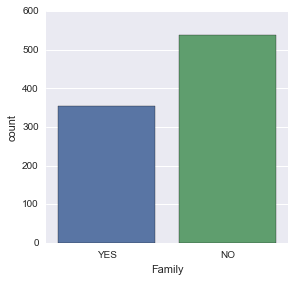

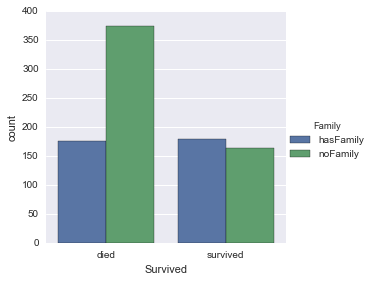

In [74]:
family_df = df.loc[:, ['SibSp', 'Parch', 'Survived']].copy()

#create a column where we can sum up the relations
family_df['Family'] = family_df['SibSp'] + family_df['Parch']
family_df['Family'].loc[family_df['Family'] > 0] = "YES"
family_df['Family'].loc[family_df['Family'] == 0] = "NO"
sns.factorplot('Family', data=family_df, kind='count')

#transform valus for the family column
family_df['Family'] = family_df['Family'].map({'YES': 'hasFamily', 'NO': 'noFamily'})
family_df['Survived'] = family_df['Survived'].map({0: 'died', 1: 'survived'})

sns.factorplot('Survived', data=family_df, hue='Family',kind='count')

As we can see in the plot above people with family on board where more likely to survive. This proofs the families have a better bonding.

**3. WOMEN AND CHILDREN FIRST**

3a. Is there a relation between the sex and the survival rate?

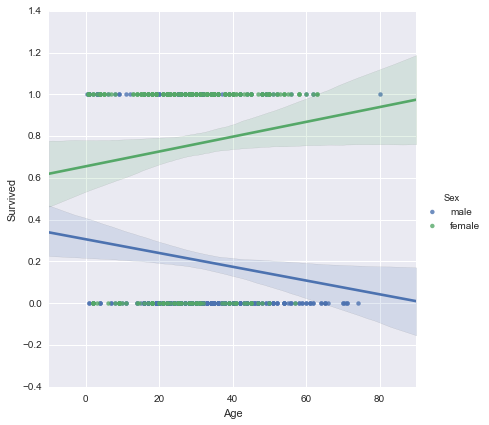

In [16]:
gender_df = df.loc[:,['Sex','Age','Survived', 'Pclass']].copy()
sns.lmplot('Age','Survived', gender_df, hue='Sex', size=6, legend=True)

As we see in the plot above more women survived the titanic. Older Women are more likely to survive than older men.

*3b. Is there a relation between the age and the survial rate?*

                Sex   Age  Survived  Pclass
PassengerId                                
1              male  22.0         0       3
2            female  38.0         1       1
3            female  26.0         1       3
4            female  35.0         1       1
5              male  35.0         0       3
6              male   NaN         0       3
7              male  54.0         0       1
8             child   2.0         0       3
9            female  27.0         1       3
10            child  14.0         1       2


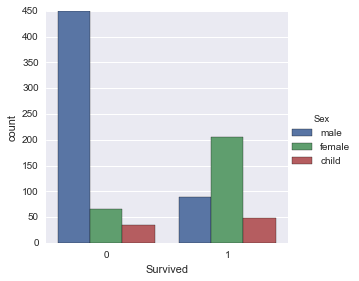

In [75]:
def get_childs(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

#change values in the sex column    
gender_df['Sex'] = gender_df[['Age','Sex']].apply(get_childs, axis=1)

print gender_df.head(10)

sns.factorplot('Survived',data=gender_df,hue='Sex',kind='count')


*3c. Are female passengers with first class tickets more likely to survive than male passengers from third class?*

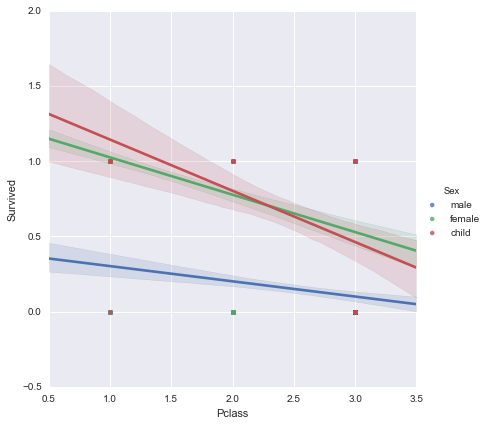

In [18]:
sns.lmplot('Pclass','Survived', gender_df, hue='Sex', size=6, legend=True)

No, children of the first class are more likely to survive than women of with a first class ticket.

*** 4. NOMEN EST OMEN ***

In [59]:
#split Name Colum with regex into new Columns, in order to get the first names and the family name separated
names_df = df.loc[:,['Name', 'Survived', 'Sex']].copy()

names_df['Lastname'] = names_df.Name.str.extract('(\w*),',expand=True)
names_df['Title'] = names_df.Name.str.extract('(\w*)\.', expand=True)
names_df['Firstname'] = names_df.Name.str.extract('\.(.*)', expand=True)
names_df['Maidenname'] = names_df.Name.str.extract('\((.*)\)', expand=True)
names_df.drop('Name', 1, inplace = True)

#split the first names in order the get firstname of every person
first_names_df = names_df.loc[:,['Firstname', 'Survived', 'Sex']].copy()
first_names_df['FirstFirstName'] = first_names_df.Firstname.str.extract('([^\s]+)',expand=True)
first_names_df['FirstFirstNameFemale'] = first_names_df.Firstname.str.extract('\(([^\s]+)',expand=True)

def get_first_names(passenger):
    FirstFirstNameFemale, FirstFirstName, Sex = passenger
    if (Sex == 'female') and (FirstFirstNameFemale != ''):
        return FirstFirstNameFemale
    else:
        return FirstFirstName

first_names_df['Real_First_Name'] = first_names_df[['FirstFirstNameFemale', 'FirstFirstName', 'Sex']].apply(get_first_names, axis=1)

first_names_df.drop('FirstFirstNameFemale', 1, inplace = True)
first_names_df.drop('FirstFirstName', 1, inplace = True)
first_names_df.drop('Firstname', 1, inplace = True)

groupNames = first_names_df.groupby(['Real_First_Name', 'Survived'])
print 'Firstnames------------------------------'
#get most common first names
print groupNames.size().sort_values(ascending=False).head(20)

print 'Lastnames------------------------------'
#get most common last names
group_last_names = names_df.groupby(['Lastname', 'Survived'])
print group_last_names.size().sort_values(ascending=False).head(10)


Firstnames------------------------------
Real_First_Name  Survived
William          0           27
John             0           22
Thomas           0           11
Charles          0           10
James            0           10
George           0           10
Henry            0            9
Johan            0            8
Richard          0            8
William          1            8
Frederick        0            7
Alfred           0            7
Joseph           0            6
Edward           0            6
Arthur           0            6
Karl             0            6
Elizabeth        1            6
Ernest           0            5
Samuel           0            5
Robert           0            5
dtype: int64
Lastnames------------------------------
Lastname    Survived
Andersson   0           7
Sage        0           7
Goodwin     0           6
Panula      0           6
Skoog       0           6
Rice        0           5
Lefebre     0           4
Gustafsson  0           4
Palsson    

*4a. What is the most common first name?*

The most common male first name is 'William'. The most commen female first name is 'Elizabeth'.

*4b. What is the most common last name?*

The most common family name was 'Andersson'.

*4c. Where they more likely to survive?*

No
